# Bayesian frameworks concept for carbon methodology

In [1]:
import indigo.dsm_utils.constants as c
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc={'axes.facecolor': c.indigo_lightgray})

### Scatter plots of data and kde plots of distributions

Generate some data: linear with some noise

In [2]:
X = np.array([0, 0.51, 2, 3.6, 4.2, 5, 6.5, 7.2, 8.7, 9])

# Draw random noise from an unbiased Gaussian dist:
mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, len(X))
Y_training = 2*X + noise

mu, sigma = 0, 2 # mean and standard deviation
noise = np.random.normal(mu, sigma, len(X))
Y_testing = 2*X + noise

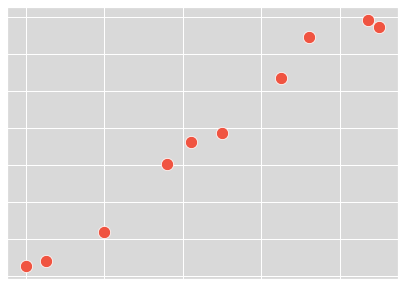

In [10]:
fix, ax = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(X, Y_training, color=c.indigo_red, s=150)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('training_data.png', dpi=150)

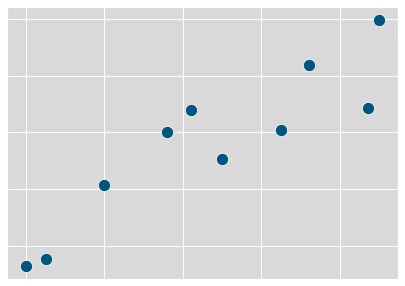

In [11]:
fix, ax = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(X, Y_testing, color=c.indigo_blue, s=150)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('testing_data.png', dpi=150)

Generate prior distributions:

In [5]:
prior_strong = np.random.normal(loc=0, scale=2, size=100000)
prior_weak = np.random.uniform(low=-10, high=10, size=1000000)

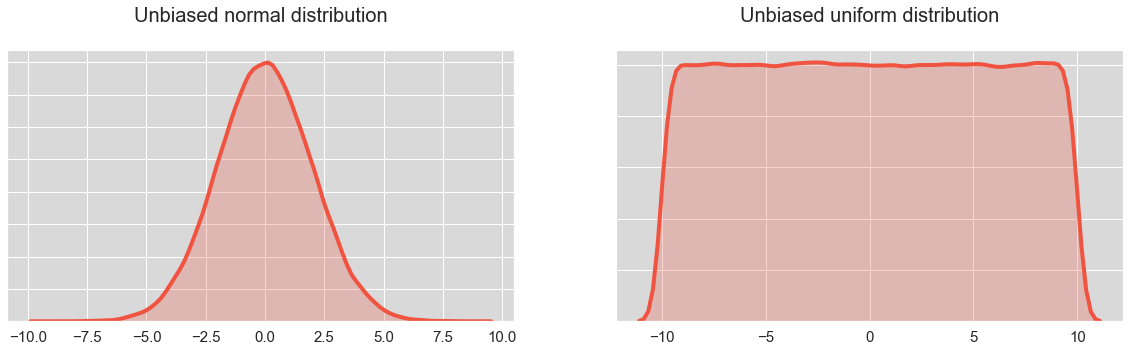

In [12]:
fix, ax = plt.subplots(1,2, figsize=(20,5))
sns.kdeplot(prior_strong, shade=True, color=c.indigo_red, lw=4, ax=ax[0])
sns.kdeplot(prior_weak, shade=True, color=c.indigo_red, lw=4, ax=ax[1])
ax[0].set_title('Unbiased normal distribution\n', fontsize=20)
ax[0].set_yticklabels([])
ax[0].tick_params(labelsize=15)

ax[1].set_title('Unbiased uniform distribution\n', fontsize=20)
ax[1].set_yticklabels([])
ax[1].tick_params(labelsize=15)
plt.savefig('prior_distributions.png', dpi=150)

Generate posterior distributions:

In [7]:
post_strong = np.random.normal(loc=1, scale=0.75, size=100000)
post_weak = np.random.normal(loc=1, scale=3, size=100000)
post_neg_biased = np.random.normal(loc=-1, scale=0.75, size=100000)

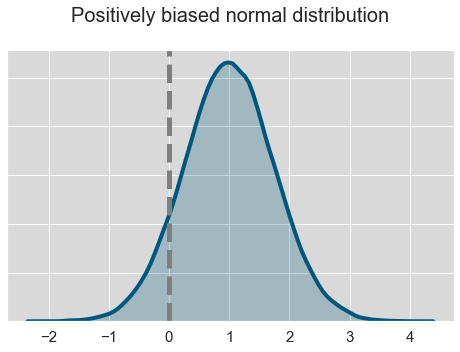

In [13]:
fix, ax = plt.subplots(1,1, figsize=(8,5))
sns.kdeplot(post_strong, shade=True, color=c.indigo_blue, lw=4, ax=ax)
ax.set_title('Positively biased normal distribution\n', fontsize=20)
ax.set_yticklabels([])
ax.tick_params(labelsize=15)
ax.axvline(x=0, ymin=0, ymax=1, lw=5, ls='--', color=c.indigo_gray)
plt.savefig('positively_biased_distribution.png', dpi=150)

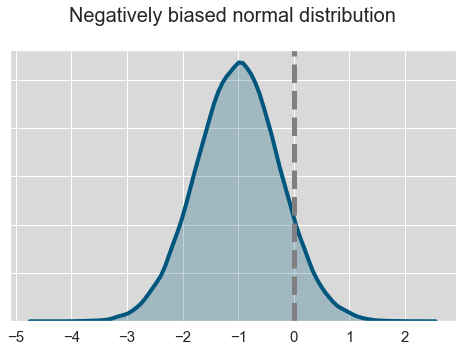

In [14]:
fix, ax = plt.subplots(1,1, figsize=(8,5))
sns.kdeplot(post_neg_biased, shade=True, color=c.indigo_blue, lw=4, ax=ax)
ax.set_title('Negatively biased normal distribution\n', fontsize=20)
ax.set_yticklabels([])
ax.tick_params(labelsize=15)
ax.axvline(x=0, ymin=0, ymax=1, lw=5, ls='--', color=c.indigo_gray)
plt.savefig('negatively_biased_distribution.png', dpi=150)

### Impact of strong vs. weak priors

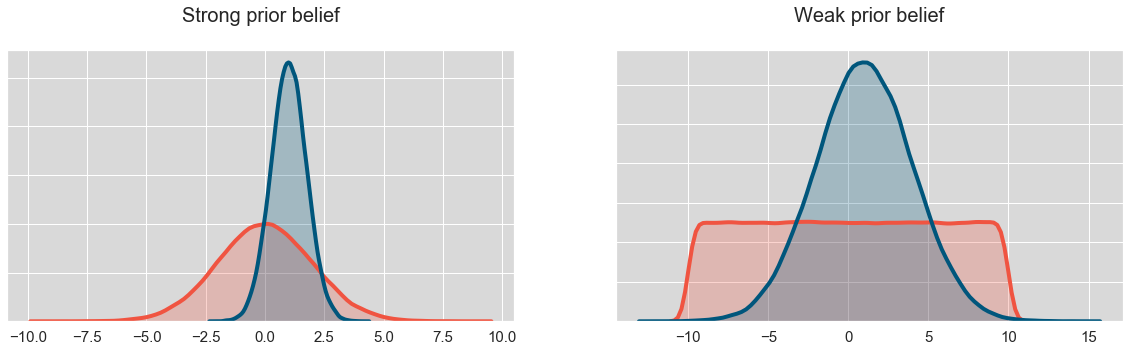

In [15]:
fix, ax = plt.subplots(1,2, figsize=(20,5))
sns.kdeplot(prior_strong, shade=True, color=c.indigo_red, lw=4, ax=ax[0])
sns.kdeplot(post_strong, shade=True, color=c.indigo_blue, lw=4, ax=ax[0])
ax[0].set_title('Strong prior belief\n', fontsize=20)
ax[0].set_yticklabels([])
ax[0].tick_params(labelsize=15)

sns.kdeplot(prior_weak, shade=True, color=c.indigo_red, lw=4, ax=ax[1])
sns.kdeplot(post_weak, shade=True, color=c.indigo_blue, lw=4, ax=ax[1])
ax[1].set_title('Weak prior belief\n', fontsize=20)
ax[1].set_yticklabels([])
ax[1].tick_params(labelsize=15)
plt.savefig('strong_vs_weak_priors.png', dpi=150)

### Impact of data availability on model uncertainty

In [16]:
# Start with some randmly clusterd data point:
X = np.array([0, 0.51, 1, 3.6, 4.2, 4.5, 7.5, 7.8, 8.7, 9])
noise = np.array([-1.47615846, -1.70712348,  0.86858304,  1.23543903,  1.52126707,
       -0.6123484 ,  1.26871058,  0.45926502, -1.23655501, -1.8406719 ])
Y = X + noise

#Try to fit a polynomial:
Z = np.poly1d(np.polyfit(X, Y, 5))

# Add uncertainty due to having no data:
with_data = 0.5
no_data = 2

high_CI = Z(X) + with_data
low_CI = Z(X) - with_data

# Fill in data point where no data is available:
X_fill = np.array([1.5, 2, 2.5, 3, 5, 5.5, 6,7])
high_CI = np.concatenate((high_CI, Z(X_fill) + no_data))
low_CI = np.concatenate((low_CI, Z(X_fill) - no_data))
X_fill = np.concatenate((X, X_fill))

CI_df = pd.DataFrame()
CI_df['X'] = X_fill
CI_df['high'] = high_CI
CI_df['prediction'] = Z(X_fill)
CI_df['low'] = low_CI

CI_df.sort_values('X', inplace=True)

In [17]:
CI_df.head()

,X,high,prediction,low
0,0.00,-1.299657,-1.799657,-2.299657
1,0.51,0.184950,-0.315050,-0.815050
2,1.00,1.759884,1.259884,0.759884
10,1.50,4.715854,2.715854,0.715854
11,2.00,5.845790,3.845790,1.845790


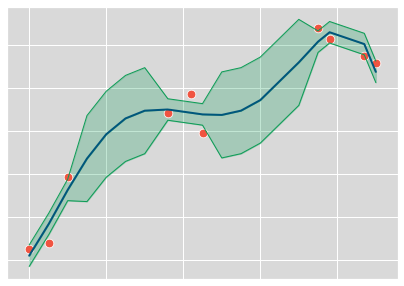

In [18]:
fix, ax = plt.subplots(1,1, figsize=(7,5))

ax.fill_between(CI_df.X, CI_df.high, CI_df.prediction, color=c.indigo_lightgreen, alpha = 0.25)
ax.fill_between(CI_df.X, CI_df.low, CI_df.prediction, color=c.indigo_lightgreen, alpha = 0.25)
sns.lineplot(CI_df.X, CI_df.prediction, color=c.indigo_blue, lw=2, ax=ax)
sns.lineplot(CI_df.X, CI_df.high, color=c.indigo_lightgreen, lw=1, ax=ax)
sns.lineplot(CI_df.X, CI_df.low, color=c.indigo_lightgreen, lw=1, ax=ax)

sns.scatterplot(X, Y, color=c.indigo_red, s=75, ax=ax)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('impact_of_data_on_CI.png', dpi=150)